In [11]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras

# package for simple neural network

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

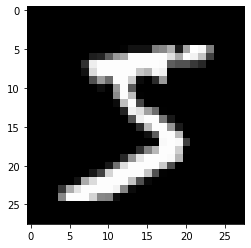

In [7]:
# Load mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plot the first image
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [8]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

# Reshape the data
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [9]:
# Build the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [14]:
# Checkpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [15]:
# Train the model
history = model.fit(x_train, to_categorical(y_train), epochs=50, batch_size=128, validation_split=0.2, callbacks=[es, mc])

Epoch 1/50
373/375 [============================>.] - ETA: 0s - loss: 0.4437 - accuracy: 0.8627
Epoch 1: val_accuracy improved from -inf to 0.95517, saving model to best_model.h5
375/375 [==============================] - 12s 20ms/step - loss: 0.4425 - accuracy: 0.8630 - val_loss: 0.1556 - val_accuracy: 0.9552
Epoch 2/50
373/375 [============================>.] - ETA: 0s - loss: 0.1853 - accuracy: 0.9438
Epoch 2: val_accuracy improved from 0.95517 to 0.96417, saving model to best_model.h5
375/375 [==============================] - 7s 19ms/step - loss: 0.1851 - accuracy: 0.9439 - val_loss: 0.1201 - val_accuracy: 0.9642
Epoch 3/50
375/375 [==============================] - ETA: 0s - loss: 0.1393 - accuracy: 0.9579
Epoch 3: val_accuracy improved from 0.96417 to 0.96925, saving model to best_model.h5
375/375 [==============================] - 7s 19ms/step - loss: 0.1393 - accuracy: 0.9579 - val_loss: 0.1010 - val_accuracy: 0.9693
Epoch 4/50
372/375 [============================>.] - ETA: 0

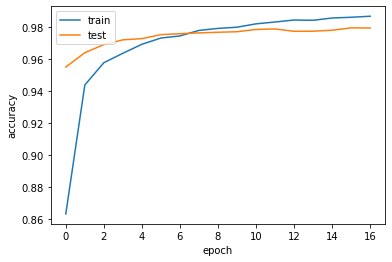

In [18]:
# Plot the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [19]:
# Evaluate the model
model.evaluate(x_test, to_categorical(y_test))

313/313 [==============================] - 4s 14ms/step - loss: 0.0685 - accuracy: 0.9813


[0.06850866973400116, 0.9812999963760376]

In [24]:
# ROC value
from sklearn.metrics import roc_auc_score

y_pred = model.predict(x_test)

micro_roc_auc = roc_auc_score(y_test, y_pred, multi_class="ovr", average="macro")

print(micro_roc_auc)

0.9996922764473343
